<a href="https://colab.research.google.com/github/abhisriv-466/Data_Analysis_and_Classification/blob/main/Data_Analysis_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

Visualizing the data

In [ ]:
space_data=pd.read_csv("/content/spaceTravel_Train_data.csv")
space_data

,PassengerId,HomePlanet,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported_Style
0,0286_01,Earth,F/65/P,55 Cancri e,57.0,False,3.0,1281.0,29.0,162.0,13.0,Carita Jimes,2
1,1406_01,Mars,E/106/S,TRAPPIST-1e,17.0,False,36.0,0.0,1013.0,0.0,0.0,Muffs Gres,0
2,3124_03,Mars,F/648/P,TRAPPIST-1e,46.0,False,0.0,0.0,0.0,0.0,0.0,Wal Hapie,1
3,5384_02,Europa,A/65/S,TRAPPIST-1e,26.0,False,0.0,4894.0,0.0,62.0,85.0,Sulatik Dinger,0
4,1455_05,Europa,B/62/S,55 Cancri e,76.0,False,0.0,2732.0,422.0,16594.0,330.0,Antino Wassird,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6949,2123_01,Earth,G/342/P,PSO J318.5-22,23.0,False,0.0,0.0,0.0,0.0,0.0,Dianya Johnsondez,1
6950,4259_01,Mars,F/796/S,TRAPPIST-1e,41.0,False,0.0,0.0,0.0,0.0,0.0,Rispid Raste,1
6951,0407_03,Earth,G/69/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Dennya Mirez,1
6952,0222_01,Mars,F/41/S,TRAPPIST-1e,20.0,False,1406.0,0.0,0.0,11.0,0.0,Gone Perte,0


Unique values in the column Home Planet

In [ ]:
space_data["HomePlanet"].unique()

array(['Earth', 'Mars', 'Europa', nan], dtype=object)

Unique values in the Target column

In [ ]:
space_data["Destination"].unique()

array(['55 Cancri e', 'TRAPPIST-1e', 'PSO J318.5-22', nan], dtype=object)

Dropping the column which are not affecting the Target values

In [ ]:
space_data.drop(["Cabin","Name"],axis=1,inplace=True)

Encoding the categorical features in order to feed into the ML model

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()

space_data["HomePlanet"]=encoder.fit_transform(space_data["HomePlanet"])

space_data["Destination"]=encoder.fit_transform(space_data["Destination"])

space_data["VIP"]=encoder.fit_transform(space_data["VIP"])

space_data.head()

,PassengerId,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_Style
0,0286_01,0,0,57.0,0,3.0,1281.0,29.0,162.0,13.0,2
1,1406_01,2,2,17.0,0,36.0,0.0,1013.0,0.0,0.0,0
2,3124_03,2,2,46.0,0,0.0,0.0,0.0,0.0,0.0,1
3,5384_02,1,2,26.0,0,0.0,4894.0,0.0,62.0,85.0,0
4,1455_05,1,0,76.0,0,0.0,2732.0,422.0,16594.0,330.0,0


Checking for null values

In [ ]:
space_data.isnull().sum()

PassengerId            0
HomePlanet             0
Destination            0
Age                  144
VIP                    0
RoomService          149
FoodCourt            143
ShoppingMall         166
Spa                  153
VRDeck               154
Transported_Style      0
dtype: int64

Handling the null values by replacing them with the mean in the case of age and median in case of other columns as the values in these columns were sparse

In [ ]:
''' Since there were no null values in the categorical features so we do need to remove any of the rows in
order to handle the null values'''


cols=["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

for col in cols:
  if(col=="Age"):
    space_data[col].fillna(space_data[col].mean(),inplace=True)
  space_data[col].fillna(space_data[col].median(),inplace=True)
space_data

,PassengerId,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_Style
0,0286_01,0,0,57.0,0,3.0,1281.0,29.0,162.0,13.0,2
1,1406_01,2,2,17.0,0,36.0,0.0,1013.0,0.0,0.0,0
2,3124_03,2,2,46.0,0,0.0,0.0,0.0,0.0,0.0,1
3,5384_02,1,2,26.0,0,0.0,4894.0,0.0,62.0,85.0,0
4,1455_05,1,0,76.0,0,0.0,2732.0,422.0,16594.0,330.0,0
...,...,...,...,...,...,...,...,...,...,...,...
6949,2123_01,0,1,23.0,0,0.0,0.0,0.0,0.0,0.0,1
6950,4259_01,2,2,41.0,0,0.0,0.0,0.0,0.0,0.0,1
6951,0407_03,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1
6952,0222_01,2,2,20.0,0,1406.0,0.0,0.0,11.0,0.0,0


Again checking for null values

In [ ]:
space_data.isnull().sum()

PassengerId          0
HomePlanet           0
Destination          0
Age                  0
VIP                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Transported_Style    0
dtype: int64

Seeing the correlation between the different features

In [ ]:
corr=space_data.corr()

corr

<ipython-input-10-af4397a23446>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=space_data.corr()


,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_Style
HomePlanet,1.000000,0.039159,0.108925,0.043472,0.189546,0.055770,0.090011,0.041970,0.035928,0.003838
Destination,0.039159,1.000000,-0.004846,-0.026334,0.035418,-0.111495,0.022486,-0.052719,-0.082508,0.004594
Age,0.108925,-0.004846,1.000000,0.033610,0.056831,0.132404,0.037880,0.118113,0.102116,-0.003944
VIP,0.043472,-0.026334,0.033610,1.000000,0.035476,0.060182,-0.006015,0.021697,0.065082,-0.004359
RoomService,0.189546,0.035418,0.056831,0.035476,1.000000,-0.013773,0.060709,0.010508,-0.015243,0.019594
FoodCourt,0.055770,-0.111495,0.132404,0.060182,-0.013773,1.000000,-0.007694,0.211842,0.211812,-0.025425
ShoppingMall,0.090011,0.022486,0.037880,-0.006015,0.060709,-0.007694,1.000000,-0.005573,-0.020205,0.027073
Spa,0.041970,-0.052719,0.118113,0.021697,0.010508,0.211842,-0.005573,1.000000,0.153627,-0.008316
VRDeck,0.035928,-0.082508,0.102116,0.065082,-0.015243,0.211812,-0.020205,0.153627,1.000000,0.008704
Transported_Style,0.003838,0.004594,-0.003944,-0.004359,0.019594,-0.025425,0.027073,-0.008316,0.008704,1.000000


Visualising the correlation by a heatmap

<Axes: >

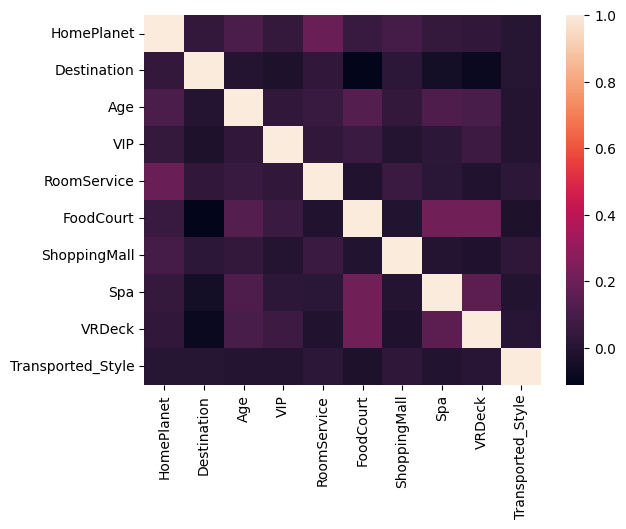

In [ ]:
sns.heatmap(corr)

Seeing the pairplots between to know how two different features are related and vary as a function of one another

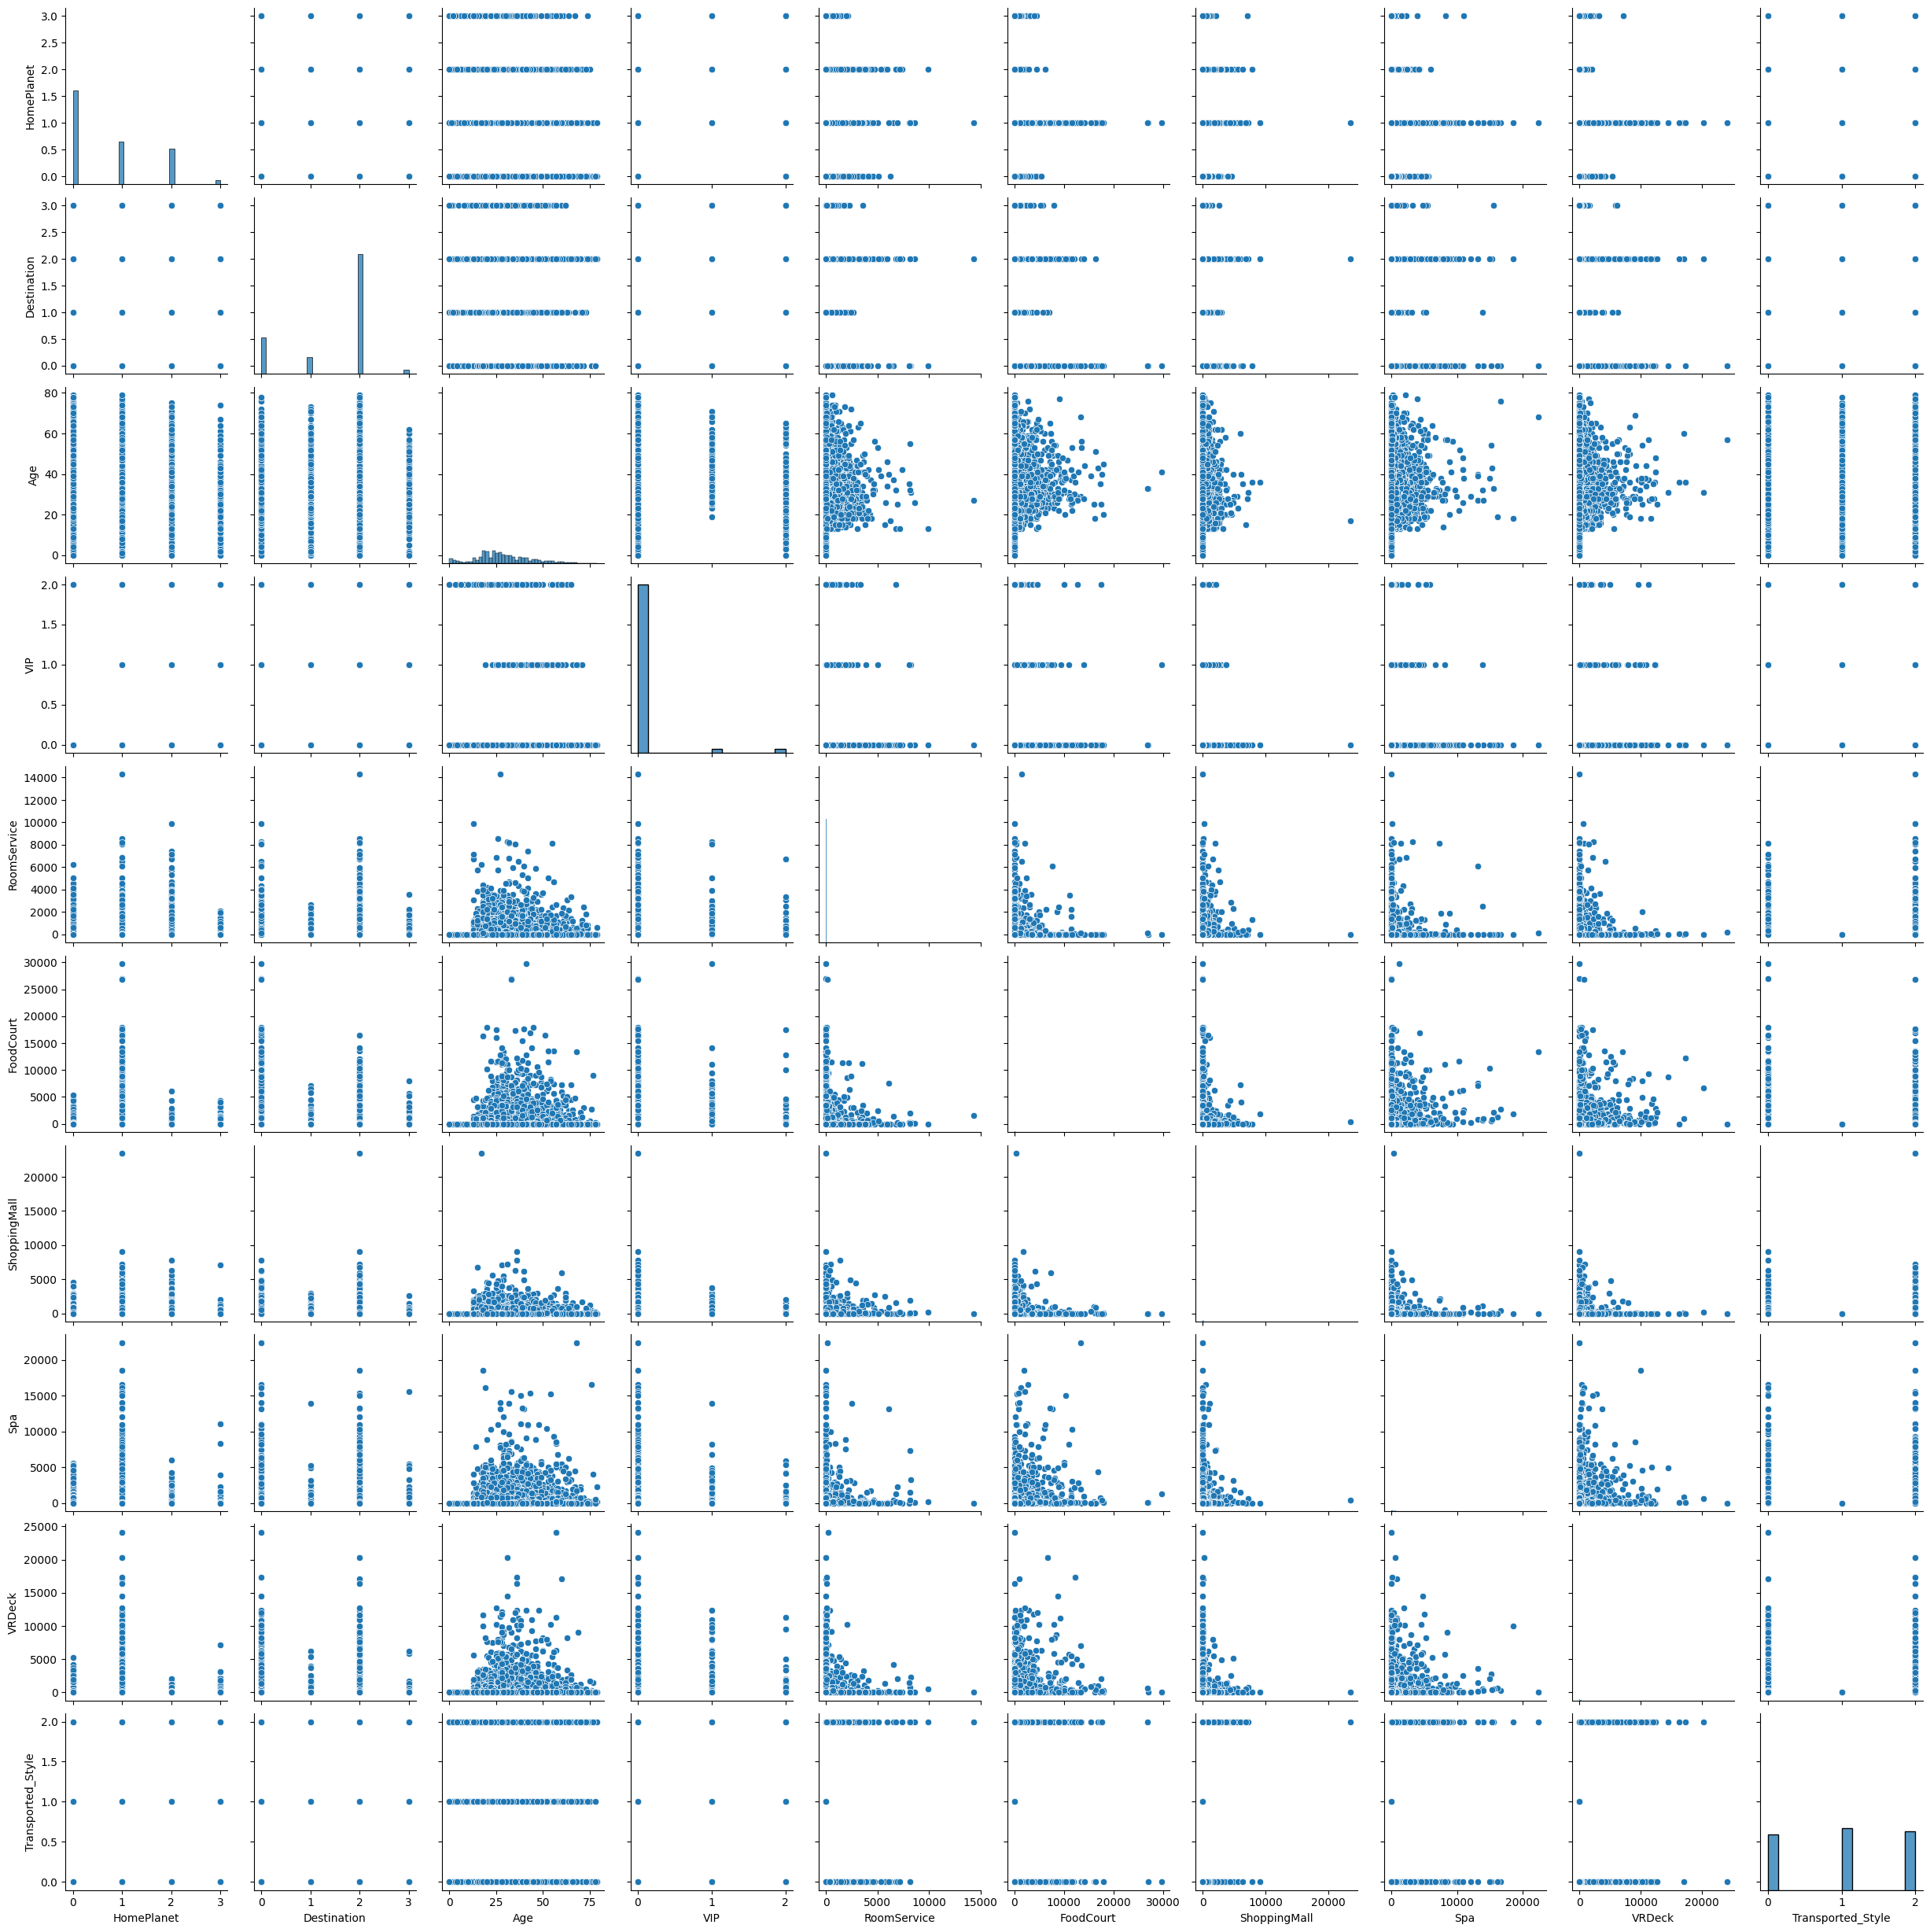

In [ ]:
sns.pairplot(space_data)

From the above pairplots, we may observe the following points:-

---



1)The spaceship having code 1 has the least cost of services like Room service, food court, shopping mall etc.

2)The number of people travelling from Home planet 0 is highest followed by 1 and 2.

3)The destination planet 2 is highest followed by 0 and then 1.

4)The age group of 20-60 has more expenses in the services like VRDeck,Spa, Shopping mall, FoodCourt.

5)The price of services like the VRDeck, ShoppingMall, FoodCourt also depend on the Home planet and the destination planet.

6)However the correlation between any two features is not very high so we may not remove any of the above features in order to make the prediction.

Keeping original dataframe here for reference

In [ ]:
space_data

,PassengerId,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_Style
0,0286_01,0,0,57.0,0,3.0,1281.0,29.0,162.0,13.0,2
1,1406_01,2,2,17.0,0,36.0,0.0,1013.0,0.0,0.0,0
2,3124_03,2,2,46.0,0,0.0,0.0,0.0,0.0,0.0,1
3,5384_02,1,2,26.0,0,0.0,4894.0,0.0,62.0,85.0,0
4,1455_05,1,0,76.0,0,0.0,2732.0,422.0,16594.0,330.0,0
...,...,...,...,...,...,...,...,...,...,...,...
6949,2123_01,0,1,23.0,0,0.0,0.0,0.0,0.0,0.0,1
6950,4259_01,2,2,41.0,0,0.0,0.0,0.0,0.0,0.0,1
6951,0407_03,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1
6952,0222_01,2,2,20.0,0,1406.0,0.0,0.0,11.0,0.0,0


Separating the features and target variable

In [ ]:
space_data.dropna(inplace=True)

X=space_data.iloc[:,1:-1]

y=space_data.iloc[:,-1]

y

0       2
1       0
2       1
3       0
4       0
       ..
6949    1
6950    1
6951    1
6952    0
6953    1
Name: Transported_Style, Length: 6954, dtype: int64

In [ ]:
X

,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,0,57.0,0,3.0,1281.0,29.0,162.0,13.0
1,2,2,17.0,0,36.0,0.0,1013.0,0.0,0.0
2,2,2,46.0,0,0.0,0.0,0.0,0.0,0.0
3,1,2,26.0,0,0.0,4894.0,0.0,62.0,85.0
4,1,0,76.0,0,0.0,2732.0,422.0,16594.0,330.0
...,...,...,...,...,...,...,...,...,...
6949,0,1,23.0,0,0.0,0.0,0.0,0.0,0.0
6950,2,2,41.0,0,0.0,0.0,0.0,0.0,0.0
6951,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0
6952,2,2,20.0,0,1406.0,0.0,0.0,11.0,0.0


Since the numerical data is very non uniform it is necessary to scale them otherwise our ML may get excessively influenced by the larger values resulting in biased and incorrect prediction

In [ ]:
'''Since the values in the features are sparse we are using the robust scaler instead of standard scaler
since robust scaler is less sesitive to outliers as it uses median instead of mean'''

from sklearn.preprocessing import RobustScaler

'''feature scaling'''
cols_to_scale=["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

robust_scaler = RobustScaler()
X[cols_to_scale] = robust_scaler.fit_transform(X[cols_to_scale])


In [ ]:
# '''feature scaling'''
# cols_to_scale=["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X[cols_to_scale]=sc.fit_transform(X[cols_to_scale])

In [ ]:
X

,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,0,57.0,0,0.076923,20.661290,1.260870,3.115385,0.351351
1,2,2,17.0,0,0.923077,0.000000,44.043478,0.000000,0.000000
2,2,2,46.0,0,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,2,26.0,0,0.000000,78.935484,0.000000,1.192308,2.297297
4,1,0,76.0,0,0.000000,44.064516,18.347826,319.115385,8.918919
...,...,...,...,...,...,...,...,...,...
6949,0,1,23.0,0,0.000000,0.000000,0.000000,0.000000,0.000000
6950,2,2,41.0,0,0.000000,0.000000,0.000000,0.000000,0.000000
6951,0,2,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000
6952,2,2,20.0,0,36.051282,0.000000,0.000000,0.211538,0.000000


Converting the dataframe into arrays because we need to feed them into the neural network, however we do not require X and y to be arrays in order to be fed into the other sklearn models

In [ ]:
X=np.array(X)
y=np.array(y)

Loading the final/actual test data

In [ ]:
space_data_test=pd.read_csv("/content/spaceTravel_Test_data.csv")
space_data_test.head()

,PassengerId,HomePlanet,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported_Style
0,6719_01,Mars,F/1396/P,TRAPPIST-1e,41.0,False,0.0,0.0,0.0,0.0,0.0,Panter Cres,1
1,3995_02,Earth,F/825/P,PSO J318.5-22,40.0,False,0.0,0.0,310.0,1.0,421.0,Charly Casonston,2
2,6921_01,Europa,C/255/S,TRAPPIST-1e,22.0,False,0.0,1914.0,2090.0,100.0,0.0,Sadrix Stersetery,0
3,5908_01,Earth,F/1126/S,TRAPPIST-1e,42.0,False,84.0,392.0,300.0,0.0,0.0,Paulia Brooker,0
4,2589_05,Europa,C/91/P,TRAPPIST-1e,29.0,False,0.0,0.0,0.0,0.0,0.0,Duhra Meteet,1


Preprocessing the test data in order to make the prediction

In [ ]:
space_data_test.drop(["Cabin","Name"],axis=1,inplace=True)

from sklearn.preprocessing import LabelEncoder

encoder= LabelEncoder()
space_data_test["HomePlanet"]=encoder.fit_transform(space_data_test["HomePlanet"])
space_data_test["Destination"]=encoder.fit_transform(space_data_test["Destination"])
space_data_test["VIP"]=encoder.fit_transform(space_data_test["VIP"])

cols=["Age","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]
for col in cols:
  if(col=="Age"):
    space_data_test[col].fillna(space_data_test[col].mean(),inplace=True)
  space_data_test[col].fillna(space_data_test[col].median(),inplace=True)
space_data_test

,PassengerId,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported_Style
0,6719_01,2,2,41.0,0,0.0,0.0,0.0,0.0,0.0,1
1,3995_02,0,1,40.0,0,0.0,0.0,310.0,1.0,421.0,2
2,6921_01,1,2,22.0,0,0.0,1914.0,2090.0,100.0,0.0,0
3,5908_01,0,2,42.0,0,84.0,392.0,300.0,0.0,0.0,0
4,2589_05,1,2,29.0,0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
1734,7356_01,0,2,40.0,0,0.0,0.0,0.0,0.0,0.0,1
1735,0334_01,2,2,29.0,0,5715.0,2.0,211.0,1476.0,0.0,0
1736,6443_05,0,2,16.0,0,45.0,0.0,622.0,0.0,564.0,0
1737,7040_01,0,2,16.0,0,0.0,0.0,0.0,0.0,0.0,1


Checking for null values in the test data

In [ ]:
space_data_test.isnull().sum()

PassengerId          0
HomePlanet           0
Destination          0
Age                  0
VIP                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Transported_Style    0
dtype: int64

In [ ]:
X_test_final=space_data_test.iloc[:,1:-1]
X_test_final

,HomePlanet,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,2,2,41.0,0,0.0,0.0,0.0,0.0,0.0
1,0,1,40.0,0,0.0,0.0,310.0,1.0,421.0
2,1,2,22.0,0,0.0,1914.0,2090.0,100.0,0.0
3,0,2,42.0,0,84.0,392.0,300.0,0.0,0.0
4,1,2,29.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1734,0,2,40.0,0,0.0,0.0,0.0,0.0,0.0
1735,2,2,29.0,0,5715.0,2.0,211.0,1476.0,0.0
1736,0,2,16.0,0,45.0,0.0,622.0,0.0,564.0
1737,0,2,16.0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_test_final=space_data_test.iloc[:,-1]
y_test_final

0       1
1       2
2       0
3       0
4       1
       ..
1734    1
1735    0
1736    0
1737    1
1738    0
Name: Transported_Style, Length: 1739, dtype: int64

Scaling the test data similarly

In [ ]:
from sklearn.preprocessing import RobustScaler

'''feature scaling using Robust scaling'''
cols_to_scale=["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

robust_scaler = RobustScaler()
X_test_final[cols_to_scale] = robust_scaler.fit_transform(X_test_final[cols_to_scale])

**I am doing train_test_split in order to check the accuracy of trained model and then the best model will be applied to the final test data provided**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

Now I am applying different models in order find the best one

First I am applying the model on the train data and checking the F1 score on the test data.

Starting by the **SVM**

In [ ]:
from sklearn.svm import SVC

SVC_model=SVC()

SVC_model.fit(X_train,y_train)

y_pred=SVC_model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

from sklearn.metrics import f1_score

# Calculate the F1 score
f1_SVC = f1_score(y_test, y_pred,average='weighted')

# Print the F1 score
print("F1 score:", f1_SVC)

Accuracy: 0.6206896551724138
F1 score: 0.5728170132906134


**Decision Tree Classifier** without Hyperparameter tuning

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC_model=DecisionTreeClassifier()

DTC_model.fit(X_train,y_train)

y_pred=DTC_model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ", accuracy)

# Calculate the F1 score
f1_DTC = f1_score(y_test, y_pred,average='weighted')

# Print the F1 score
print("F1 score:", f1_DTC)

Accuracy:  0.6364942528735632
F1 score: 0.6280478794952987


**Decision Tree Classifier** with **hyperparameter tuning**.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameter={"min_samples_split":[1,2,4,5,10,15],"min_samples_leaf":[1,2,3,4,5,7],"max_leaf_nodes":[10,100,500,1000,2000]}

grid_search=GridSearchCV(DTC_model,param_grid=parameter,cv=5)

grid_search.fit(X_train,y_train)

y_pred=grid_search.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ", accuracy)

# Calculate the F1 score
f1_DTC_h = f1_score(y_test, y_pred,average='weighted')

# Print the F1 score
print("F1 score:", f1_DTC_h)

Accuracy:  0.6293103448275862
F1 score: 0.5748436433169599


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
150 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _vali

**Random Forest Classifier** without hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC_model=RandomForestClassifier(n_estimators=100,random_state=42)

RFC_model.fit(X_train,y_train)

y_pred=RFC_model.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ", accuracy)

# Calculate the F1 score
f1_RFC = f1_score(y_test, y_pred,average='weighted')

# Print the F1 score
print("F1 score:", f1_RFC)

Accuracy:  0.6336206896551724
F1 score: 0.6262210170094263


**Random Forest Classifier** with **hyperparameter tuning**

In [ ]:
'''This cell will take around 30-40 minutes to execute'''

RFC_model=RandomForestClassifier()

parameter={'n_estimators':[100,200,300,400],'max_depth':[None,5,10,15],'min_samples_split':[2,5,10,13],'min_samples_leaf':[1,2,4,6]}

grid_search=GridSearchCV(RFC_model,param_grid=parameter,cv=5)

grid_search.fit(X_train,y_train)

y_pred=grid_search.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
accuracy
print("Accuracy: ", accuracy)

# Calculate the F1 score
f1_RFC_h = f1_score(y_test, y_pred,average='weighted')

# Print the F1 score
print("F1 score:", f1_RFC_h)

Accuracy:  0.6264367816091954
F1 score: 0.6047398405884074


**Logistic Regression** without hyperparameter tuning

In [ ]:
from sklearn.linear_model import LogisticRegression

Log_reg=LogisticRegression(max_iter=1000)

Log_reg.fit(X_train,y_train)

y_pred=Log_reg.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
accuracy
print("Accuracy: ", accuracy)

# Calculate the F1 score
f1_Log_reg = f1_score(y_test, y_pred,average='weighted')

# Print the F1 score
print("F1 score:", f1_Log_reg)

Accuracy:  0.6235632183908046
F1 score: 0.5640386464645911


**Logistic Regression** with **hyperparameter tuning**

In [ ]:
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,5,10,50,100],'max_iter':[100,500,1000]}

grid_search=GridSearchCV(Log_reg,param_grid=parameter,scoring='accuracy',cv=5)

grid_search.fit(X_train,y_train)

y_pred=grid_search.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
accuracy
print("Accuracy: ", accuracy)

# Calculate the F1 score
f1_Log_reg_h = f1_score(y_test, y_pred,average='weighted')

# Print the F1 score
print("F1 score:", f1_Log_reg_h)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy:  0.625
F1 score: 0.5666175970816013


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
180 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Sol

In [ ]:
X_test

array([[ 0.        ,  2.        , 37.        , ...,  1.13043478,
         0.        ,  3.13513514],
       [ 1.        ,  0.        , 28.84478708, ...,  0.        ,
        16.88461538, 11.97297297],
       [ 1.        ,  0.        , 42.        , ...,  0.        ,
        51.48076923,  7.64864865],
       ...,
       [ 0.        ,  2.        , 25.        , ...,  0.        ,
         2.63461538, 17.10810811],
       [ 0.        ,  0.        ,  6.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  2.        , 25.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
X

array([[ 0.        ,  0.        , 57.        , ...,  1.26086957,
         3.11538462,  0.35135135],
       [ 2.        ,  2.        , 17.        , ..., 44.04347826,
         0.        ,  0.        ],
       [ 2.        ,  2.        , 46.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  2.        , 39.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.        ,  2.        , 20.        , ...,  0.        ,
         0.21153846,  0.        ],
       [ 2.        ,  2.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
X_train

array([[0.00000000e+00, 2.00000000e+00, 1.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.48918919e+01],
       [0.00000000e+00, 2.00000000e+00, 2.00000000e+01, ...,
        2.42608696e+01, 0.00000000e+00, 6.21621622e+00],
       [1.00000000e+00, 2.00000000e+00, 2.00000000e+01, ...,
        1.64478261e+02, 3.09615385e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 2.30000000e+01, ...,
        4.34782609e-02, 5.45769231e+01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.70000000e+01, ...,
        0.00000000e+00, 7.69230769e-02, 1.43243243e+00],
       [0.00000000e+00, 2.00000000e+00, 3.20000000e+01, ...,
        2.04347826e+00, 1.64807692e+01, 6.21621622e-01]])

In [ ]:
X_test

array([[ 0.        ,  2.        , 37.        , ...,  1.13043478,
         0.        ,  3.13513514],
       [ 1.        ,  0.        , 28.84478708, ...,  0.        ,
        16.88461538, 11.97297297],
       [ 1.        ,  0.        , 42.        , ...,  0.        ,
        51.48076923,  7.64864865],
       ...,
       [ 0.        ,  2.        , 25.        , ...,  0.        ,
         2.63461538, 17.10810811],
       [ 0.        ,  0.        ,  6.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 3.        ,  2.        , 25.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
y_train

array([2, 2, 0, ..., 0, 2, 2])

In [ ]:
y_test

array([2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 2, 0,
       0, 0, 2, 1, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 2, 2, 1, 0, 0, 1, 2, 1,
       0, 0, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 1, 0, 1,
       0, 2, 1, 2, 1, 1, 0, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 0, 2, 2, 2, 1,
       1, 1, 1, 0, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 1, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 1, 0,
       2, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 0, 2, 2, 0,
       0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 2, 1, 1, 0, 2,
       1, 2, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2,
       1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0,
       2, 2, 0, 1, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 1,

In [ ]:
X_test_final=np.array(X_test_final)
X_test_final

array([[2.00000000e+00, 2.00000000e+00, 4.10000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 4.00000000e+01, ...,
        1.63157895e+01, 1.72413793e-02, 8.59183673e+00],
       [1.00000000e+00, 2.00000000e+00, 2.20000000e+01, ...,
        1.10000000e+02, 1.72413793e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 2.00000000e+00, 1.60000000e+01, ...,
        3.27368421e+01, 0.00000000e+00, 1.15102041e+01],
       [0.00000000e+00, 2.00000000e+00, 1.60000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00000000e+00, 2.50000000e+01, ...,
        2.73684211e+01, 0.00000000e+00, 0.00000000e+00]])

**Sequential Model** with layers as dense using Keras

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.utils import to_categorical

# Convert the labels to categorical format
y_train_categorical = to_categorical(y_train)
# Create the model
classifier = Sequential()
classifier.add(Dense(units=200, kernel_initializer='uniform', input_dim=9))
classifier.add(LeakyReLU(alpha=0.05))
classifier.add(Dense(units=100, kernel_initializer='uniform'))
classifier.add(LeakyReLU(alpha=0.05))
classifier.add(Dense(units=100, kernel_initializer='uniform'))
classifier.add(LeakyReLU(alpha=0.05))
classifier.add(Dense(units=3, kernel_initializer='uniform', activation='softmax'))


In [ ]:
# Compile the model
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model to the training data
classifier.fit(X_train, y_train_categorical, batch_size=100, epochs=200)

Epoch 1/200
63/63 [==============================] - 1s 4ms/step - loss: 0.7477 - accuracy: 0.6026
Epoch 2/200
63/63 [==============================] - 0s 4ms/step - loss: 0.6308 - accuracy: 0.6421
Epoch 3/200
63/63 [==============================] - 0s 5ms/step - loss: 0.6254 - accuracy: 0.6401
Epoch 4/200
63/63 [==============================] - 0s 6ms/step - loss: 0.6214 - accuracy: 0.6421
Epoch 5/200
63/63 [==============================] - 0s 6ms/step - loss: 0.6155 - accuracy: 0.6507
Epoch 6/200
63/63 [==============================] - 0s 6ms/step - loss: 0.6192 - accuracy: 0.6464
Epoch 7/200
63/63 [==============================] - 0s 6ms/step - loss: 0.6132 - accuracy: 0.6459
Epoch 8/200
63/63 [==============================] - 0s 6ms/step - loss: 0.6120 - accuracy: 0.6448
Epoch 9/200
63/63 [==============================] - 0s 6ms/step - loss: 0.6132 - accuracy: 0.6477
Epoch 10/200
63/63 [==============================] - 0s 6ms/step - loss: 0.6170 - accuracy: 0.6492
Epoch 11/

Checking accuracy and F1 score

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score

y_test_categorical=to_categorical(y_test)

y_pred_prob = classifier.predict(X_test)
y_pred = y_pred_prob.argmax(axis=1)  # Convert predicted probabilities to class labels

accuracy=accuracy_score(y_test,y_pred)
print("Accuracy: ",accuracy)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the F1 score
print("F1 score:", f1)



22/22 [==============================] - 0s 2ms/step
Accuracy:  0.6235632183908046
F1 score: 0.6060808419049731


Observations of different F1 scores

In [ ]:
print("F1 score of SVC :", f1_SVC)
print("F1 score of DTC :", f1_DTC)
print("F1 score of DTC with hyperparameter tuning :", f1_DTC_h)
print("F1 score of RFC :", f1_RFC)
print("F1 score of RFC with hyperparameter tuning :", f1_RFC_h)
print("F1 score of Logistic Regression :", f1_Log_reg)
print("F1 score of Logistic Regression with hyperparameter tuning :", f1_Log_reg_h)
print("F1 score of ANN :", f1)

F1 score of SVC : 0.5728170132906134
F1 score of DTC : 0.6267333600312521
F1 score of DTC with hyperparameter tuning : 0.5748436433169599
F1 score of RFC : 0.6262210170094263
F1 score of RFC with hyperparameter tuning : 0.6047398405884074
F1 score of Logistic Regression : 0.5640386464645911
F1 score of Logistic Regression with hyperparameter tuning : 0.5666175970816013
F1 score of ANN : 0.6060808419049731


As of now we are getting best F1 score in the Decision Tree Classifier
So applying it to our final test data

In [ ]:
DTC_model.fit(X,y)

y_pred_final=DTC_model.predict(X_test_final)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [ ]:
y_pred_final

array([1, 0, 0, ..., 2, 1, 0])

In [ ]:
# Calculate the F1 score
f1_DTC_final= f1_score(y_test_final, y_pred_final, average='weighted')

# Print the F1 score
print("F1 score:", f1_DTC_final)

F1 score: 0.6302596945192249
